In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil import parser
from datetime import datetime
import json

In [2]:
# df = pd.read_csv('lab01-sp22.csv', usecols=[i for i in range(6) if i != 2]) # 2 is data

In [3]:
name = 'lab01-sp22.csv'
sp22 = 'sp22' in name
columns = ['timestamp','message_type','student_id','is_submission','assignment']
if sp22:
    columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type']
data_col = 7 if sp22 else 2
df = pd.read_csv(name, usecols=[i for i in range(len(columns) + 1) if i != data_col]) # 2 is data
df.columns = columns

In [4]:
df.head()

,assignment_id,assignment,backup_id,timestamp,student_id,is_submission,message_type
0,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,analytics
1,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,unlock
2,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,file_contents
3,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,unlock
4,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,analytics


### How to measure learning
try to estimate the following:
1. time spent on problem
    - we have the time started and time ended for each problem. will need to use the data column though. maybe i can start with just time spent on the homework overall.
2. number of attempts
    - can just count
    
Start with per assignment granularity. Then generalize to per problem.

In [5]:
df

,assignment_id,assignment,backup_id,timestamp,student_id,is_submission,message_type
0,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,analytics
1,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,unlock
2,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,file_contents
3,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,unlock
4,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,analytics
...,...,...,...,...,...,...,...
330624,9844,cal/cs61a/sp22/lab01,32994543,2022-02-10 06:24:22,75788,0,problem
330625,9844,cal/cs61a/sp22/lab01,32994543,2022-02-10 06:24:22,75788,0,analytics
330626,9844,cal/cs61a/sp22/lab01,32995195,2022-02-10 06:31:45,75788,0,file_contents
330627,9844,cal/cs61a/sp22/lab01,32995195,2022-02-10 06:31:45,75788,0,grading


In [6]:
assignments = df.assignment_id.unique()
hw1 = 'cal/cs61a/sp21/hw01'
students = df.student_id.unique()
len(students)

1094

In [7]:
is_hw1 = df.assignment_id == hw1
hw1_data = df[is_hw1]
hw1_students = hw1_data.student_id.unique()
len(hw1_data)
len(hw1_students)

0

In [8]:
num_logs = {}
students = hw1_data.student_id.unique()
for student in students:
    num_logs[student] = len(hw1_data[hw1_data.student_id == student])

Num Logs Summary Statistics


,0
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


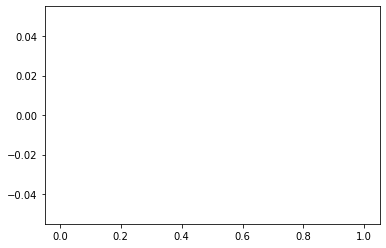

In [9]:
num_logs_vals = np.array(list(num_logs.values()))
plt.hist(list(num_logs_vals))
print("Num Logs Summary Statistics")
pd.DataFrame(num_logs_vals).describe()

In [10]:
time_estimate = {}
for student in students:
    student_data = hw1_data[hw1_data.student_id == student]
    if len(student_data) == 0:
        continue
    start = parser.parse(student_data.iloc[0].timestamp)
    end = parser.parse(student_data.iloc[-1].timestamp)
    time_estimate[student] = (end - start).total_seconds() / 3600

Time Estimate (hours) Summary Statistics


,0
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


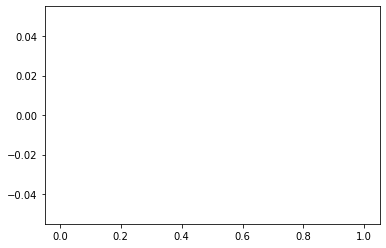

In [11]:
time_estimate
time_estimate_vals = np.array(list(time_estimate.values()))
print("Time Estimate (hours) Summary Statistics")
time_estimate_vals.sort()
time_estimate_vals = time_estimate_vals[:-20] # ignore outliers for better graph
plt.hist(list(time_estimate_vals))
pd.DataFrame(time_estimate_vals).describe()

### Generating csv's for each assignment

In [12]:
df_full = pd.read_csv('lab01-sp22.csv', usecols=[i for i in range(7)])

In [13]:
df_full.columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type']
# df_full.columns = ['timestamp','message_type','student_id','is_submission','assignment']
df_full

,assignment_id,assignment,backup_id,timestamp,student_id,is_submission,message_type
0,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,analytics
1,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,unlock
2,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,file_contents
3,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,unlock
4,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,analytics
...,...,...,...,...,...,...,...
330624,9844,cal/cs61a/sp22/lab01,32994543,2022-02-10 06:24:22,75788,0,problem
330625,9844,cal/cs61a/sp22/lab01,32994543,2022-02-10 06:24:22,75788,0,analytics
330626,9844,cal/cs61a/sp22/lab01,32995195,2022-02-10 06:31:45,75788,0,file_contents
330627,9844,cal/cs61a/sp22/lab01,32995195,2022-02-10 06:31:45,75788,0,grading


In [14]:
for (assignment), group in df_full.groupby(['assignment']):
    name = assignment[assignment.rindex('/') + 1:]
    if name == 'proj04':
        print(f"exporting {name}")
        group.to_csv(f'{name}.csv', index=False)

### Let's switch to a per question granularity

In [15]:
name = 'lab01-sp22.csv'
sp22 = 'sp22' in name
columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type']
if sp22:
    columns = ['assignment_id','assignment', 'backup_id', 'timestamp', 'student_id', 'is_submission', 'message_type', 'data']

assignment_df = pd.read_csv(name, usecols=[i for i in range(len(columns))]) # 2 is data
assignment_df.columns = columns

In [16]:
assignment_df.head()

,assignment_id,assignment,backup_id,timestamp,student_id,is_submission,message_type,data
0,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,analytics,"{""requested-questions"": [""control""], ""time"": ""..."
1,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,unlock,"[{""misU count"": {}, ""prompt"": "">>> def xk(c, d..."
2,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,file_contents,"{""lab01.py"": ""def falling(n, k):\n \""\""\""Co..."
3,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,unlock,"[{""correct"": false, ""answer"": [""True""], ""print..."
4,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,analytics,"{""requested-questions"": [""short-circuit""], ""hi..."


In [17]:
assignment_df['data'][0]

'{"requested-questions": ["control"], "time": "2022-01-18 10:52:22.016206", "time-utc": "2022-01-18 18:52:22.016325", "history": {"questions": {"Control": {"attempts": 1, "solved": false}}, "all_attempts": 1, "question": ["Control"]}, "question": ["Control"], "unlock": true}'

In [18]:
# displaying the students that have no "grading" data
grading_students = assignment_df[assignment_df.message_type == 'grading'].student_id.unique()
no_grading_students = [student for student in hw1_students if student not in grading_students]
print(len(no_grading_students))
print(grading_students)
print(no_grading_students)
print(assignment_df[assignment_df.message_type != 'grading'].iloc[1200])
assignment_df[assignment_df.student_id == 21969]

0
[35204 33457 35348 ... 75742 75831 75788]
[]
assignment_id                    9844
assignment       cal/cs61a/sp22/lab01
backup_id                    32473746
timestamp         2022-01-21 08:17:09
student_id                      35481
is_submission                       0
message_type                  problem
data                "digit_pos_match"
Name: 1275, dtype: object


,assignment_id,assignment,backup_id,timestamp,student_id,is_submission,message_type,data


In [19]:
# compute number of attempts per question
questions = ['Control', 'Veritasiness', 'add_in_range', 'digit_pos_match', 'falling', 'sum_digits']
student = 21969
num_attempts_per_question = {question: {student: 0 for student in grading_students} for question in questions}
for student in grading_students:
    for row in assignment_df[(assignment_df.student_id == student) & (assignment_df.message_type == 'grading')].itertuples():
    #     print(row)
        data = json.loads(row.data)
        if len(list(data)) != 1:
            continue
            print(row)
            print(data)
        question = list(data)[0]
        if question in num_attempts_per_question:
            num_attempts_per_question[question][student] += 1
#         print(question)

Control Number of Attempts Summary Statistics


,0
count,1072.000000
mean,0.197761
std,0.822237
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,12.000000


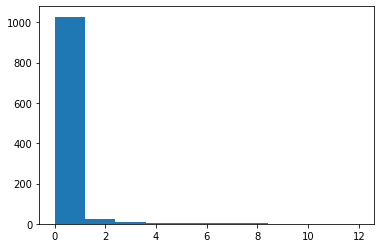

In [20]:
control = np.array(list(num_attempts_per_question['Control'].values()))
plt.hist(list(control))
print("Control Number of Attempts Summary Statistics")
pd.DataFrame(control).describe()

Veritasiness Number of Attempts Summary Statistics


,0
count,1072.000000
mean,0.004664
std,0.080710
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


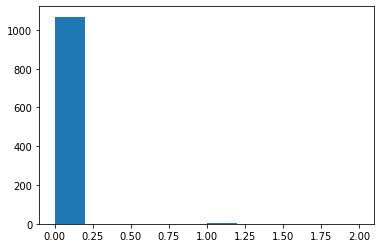

In [21]:
veritasiness = np.array(list(num_attempts_per_question['Veritasiness'].values()))
plt.hist(list(veritasiness))
print("Veritasiness Number of Attempts Summary Statistics")
pd.DataFrame(veritasiness).describe()

ControlNumber of Attempts Summary Statistics


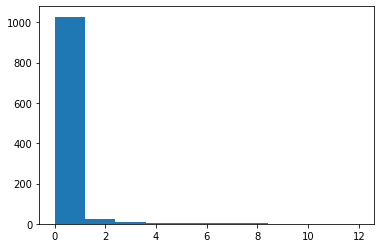

                 0
count  1072.000000
mean      0.197761
std       0.822237
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      12.000000
VeritasinessNumber of Attempts Summary Statistics


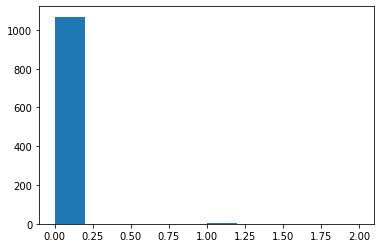

                 0
count  1072.000000
mean      0.004664
std       0.080710
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
add_in_rangeNumber of Attempts Summary Statistics


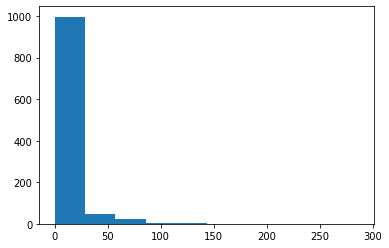

                 0
count  1072.000000
mean      9.152985
std      17.426782
min       0.000000
25%       1.000000
50%       3.000000
75%       9.000000
max     287.000000
digit_pos_matchNumber of Attempts Summary Statistics


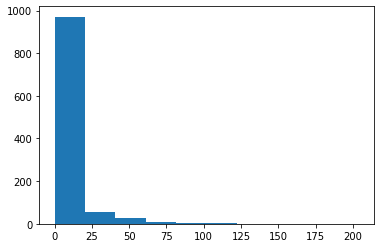

                 0
count  1072.000000
mean      8.650187
std      15.977103
min       0.000000
25%       1.000000
50%       3.000000
75%       9.000000
max     204.000000
fallingNumber of Attempts Summary Statistics


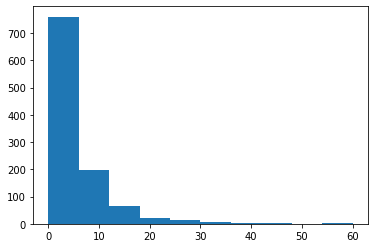

                 0
count  1072.000000
mean      5.125933
std       6.614078
min       0.000000
25%       1.000000
50%       3.000000
75%       6.000000
max      60.000000
sum_digitsNumber of Attempts Summary Statistics


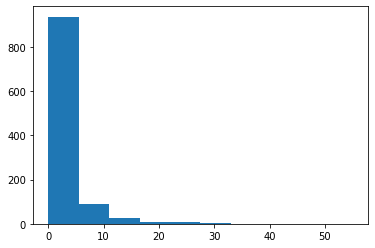

                 0
count  1072.000000
mean      2.929104
std       4.271222
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      55.000000


In [22]:
for q in questions:
    temp = np.array(list(num_attempts_per_question[q].values()))
    plt.figure()
    print(q + "Number of Attempts Summary Statistics")
    plt.hist(list(temp))
    plt.show()
    print(pd.DataFrame(temp).describe())

In [23]:
assignment_df.head()

,assignment_id,assignment,backup_id,timestamp,student_id,is_submission,message_type,data
0,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,analytics,"{""requested-questions"": [""control""], ""time"": ""..."
1,9844,cal/cs61a/sp22/lab01,32456253,2022-01-18 18:57:57,35204,0,unlock,"[{""misU count"": {}, ""prompt"": "">>> def xk(c, d..."
2,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,file_contents,"{""lab01.py"": ""def falling(n, k):\n \""\""\""Co..."
3,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,unlock,"[{""correct"": false, ""answer"": [""True""], ""print..."
4,9844,cal/cs61a/sp22/lab01,32456254,2022-01-18 19:00:36,35204,0,analytics,"{""requested-questions"": [""short-circuit""], ""hi..."


In [24]:
student_sample = assignment_df[assignment_df['student_id'] == 22402]
student_sample.head()

,assignment_id,assignment,backup_id,timestamp,student_id,is_submission,message_type,data


In [31]:
timestamps_sample = list(assignment_df['timestamp'])


def bucket_diffs(timestamps):
    num_buckets = 0

    if len(timestamps) <= 1:
        return None
    
    result, timestamps = [], list(timestamps)
    
    initial_timestamp = parser.parse(timestamps[0])
    
    for i in range(len(timestamps) - 1):
        current_timestamp = parser.parse(timestamps[i])
        next_timestamp = parser.parse(timestamps[i + 1])
        time_temp = (next_timestamp - current_timestamp).total_seconds() / 3600
        
        
        if time_temp >= 1.2:
            num_buckets += 1
            temp_time_to_add = (current_timestamp - initial_timestamp).total_seconds() / 3600
            
            initial_timestamp = next_timestamp
            result.append(temp_time_to_add)
    
    if parser.parse(timestamps[-1]) != initial_timestamp:
        time_temp = (parser.parse(timestamps[-1]) - initial_timestamp).total_seconds() / 3600
        result.append(time_temp)
            
    
#     result.append((parser.parse(timestamps[-1]) - parser.parse(timestamps[0])).total_seconds() / 3600)
    
    return result
        


In [32]:
buckets_all_students = assignment_df.groupby('student_id')['timestamp'].agg(bucket_diffs)
buckets_all_students


student_id
15020                        [1.3375, 0.16916666666666666]
16814            [0.17027777777777778, 1.1622222222222223]
17707                                 [0.8252777777777778]
19152           [0.26222222222222225, 0.10972222222222222]
20499                                [0.03833333333333333]
                               ...                        
75579    [0.7511111111111111, 0.04861111111111111, 0.92...
75739                                [0.13277777777777777]
75742           [0.029166666666666667, 0.5386111111111112]
75788             [2.013611111111111, 0.33166666666666667]
75831                                 [0.9280555555555555]
Name: timestamp, Length: 1094, dtype: object

In [33]:
bucket_times = [sum(bucket_list) for bucket_list in list(buckets_all_students) if bucket_list != None]
bucket_times

[1.5066666666666666,
 1.3325,
 0.8252777777777778,
 0.37194444444444447,
 0.03833333333333333,
 1.913888888888889,
 0.2594444444444444,
 0.11222222222222222,
 1.3869444444444445,
 1.5597222222222222,
 2.0316666666666667,
 2.79,
 0,
 0.30333333333333334,
 0.26416666666666666,
 2.507777777777778,
 3.6905555555555556,
 1.9,
 11.16583333333333,
 1.9472222222222222,
 0.19027777777777777,
 0,
 3.76,
 0.010555555555555556,
 0.4880555555555556,
 0.9291666666666666,
 0.32472222222222225,
 0.5036111111111111,
 0.8041666666666667,
 0.7908333333333334,
 2.687222222222222,
 0.17305555555555555,
 2.4405555555555556,
 0.9919444444444444,
 0.37194444444444447,
 2.9830555555555556,
 1.3202777777777779,
 1.6666666666666667,
 1.3319444444444444,
 2.1566666666666667,
 3.0391666666666666,
 3.879166666666667,
 0.7275,
 3.0716666666666668,
 2.033611111111111,
 1.0363888888888888,
 0.5997222222222223,
 2.160833333333333,
 1.1861111111111111,
 0.8322222222222222,
 4.1325,
 5.8774999999999995,
 0.80805555555555

bucket_times Summary Statistics


(array([287., 329., 213., 133.,  60.,  37.,  11.,  13.,   4.,   6.]),
 array([ 0.        ,  1.15736111,  2.31472222,  3.47208333,  4.62944444,
         5.78680556,  6.94416667,  8.10152778,  9.25888889, 10.41625   ,
        11.57361111]),
 <BarContainer object of 10 artists>)

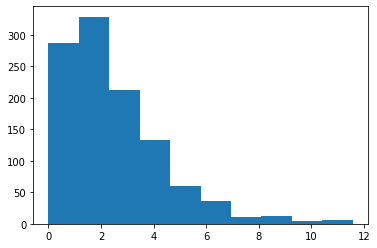

In [34]:
print("bucket_times Summary Statistics")
plt.hist(bucket_times)

In [35]:
pd.DataFrame(bucket_times).describe()

,0
count,1093.000000
mean,2.514274
std,1.884002
min,0.000000
25%,1.116389
50%,2.058333
75%,3.395278
max,11.573611


In [36]:
len(timestamps_sample)

330629